# **Neural Network: Predicting Chances of Admission**
## Author: **Gabriel Egbenya**

--------------------
## **Context**
--------------------

The world is developing rapidly and continuously looking for the best knowledge and experience among people. This motivates people all around the world to stand out in their jobs and look for higher degrees that can help them in improving their skills and knowledge. As a result, the number of students applying for Master's programs has increased substantially.

The current admission dataset was created for the prediction of admissions into the University of California, Los Angeles (UCLA). It was built to help students in shortlisting universities based on their profiles. The predicted output gives them a fair idea about their chances of getting accepted.

----------------------
## **Objective**
----------------------

We need to build a classification model using neural networks to predict a student's chances of admission into UCLA.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains several features which are considered important during the application for Masters Programs.
The features included are:

- **GRE Scores:** (out of 340)

- **TOEFL Scores:** (out of 120)

- **University Rating:**  It indicates the Bachelor University ranking (out of 5)

- **Statement of Purpose Strength:** (out of 5)

- **Letter of Recommendation Strength:** (out of 5)

- **Undergraduate GPA:** (out of 10)

- **Research Experience:** (either 0 or 1)

- **Chance of Admit:** (ranging from 0 to 1)

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [10]:
import os

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# loading the dataset
Admission_Predict = pd.read_csv('Admission_Predict.csv')

# Check the top five records of the data
Admission_Predict.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
data = Admission_Predict.copy()

In [14]:
data.shape

(500, 9)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [16]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [18]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [19]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Observation

* Serial No has unique values, we will be dropping this field
* Chance of Admit is the target variable with multiple unique values, we will label encode this to 0 and 1. if the chance of admit value is above 80%, then 1 else 0.

In [20]:
data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)

In [21]:
# Dropping the serial no and Chance of Admit field
data.drop(['Serial No.', 'Chance of Admit '], axis=1, inplace=True)
print(data.shape)
data.head()

(500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


## Let's do a little EDA

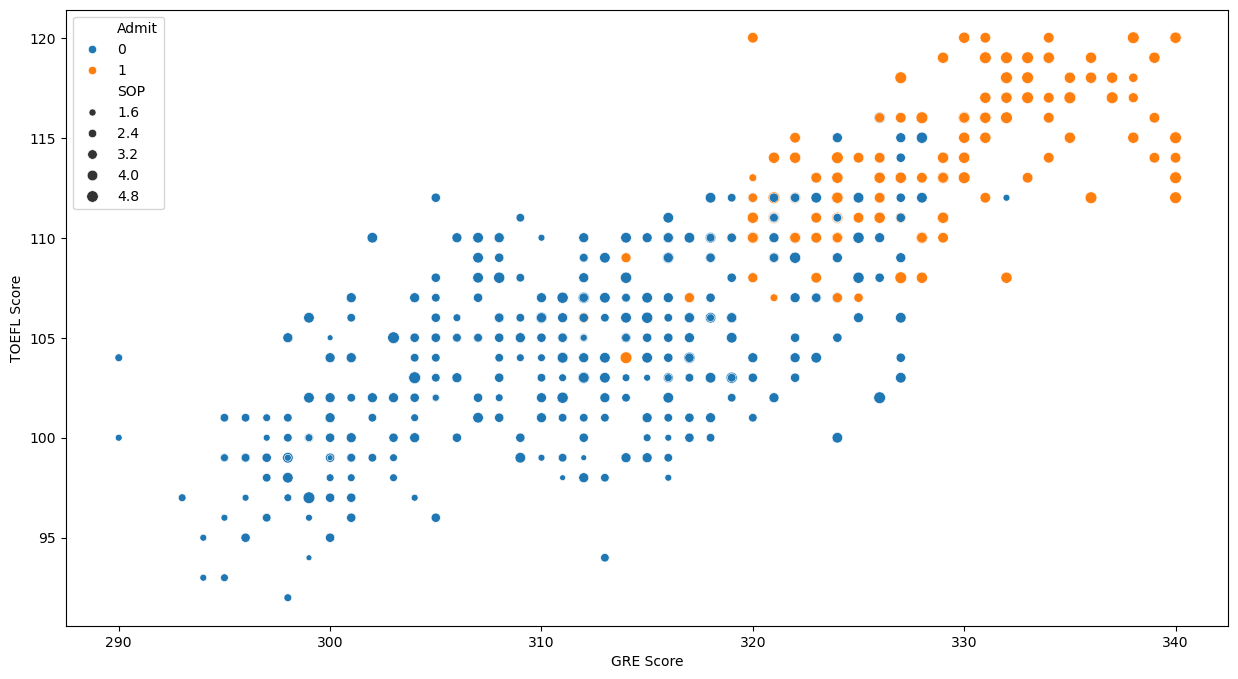

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,
           x='GRE Score',
           y='TOEFL Score',
           hue='Admit',
           size='SOP');

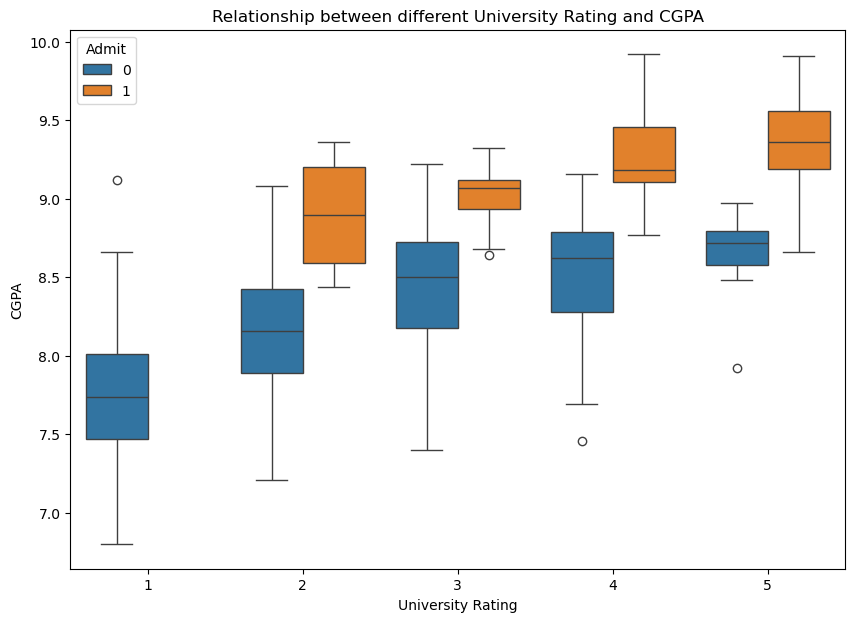

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,
             x='University Rating',
             y='CGPA',
             hue='Admit')
plt.title('Relationship between different University Rating and CGPA')
plt.show()

## Data Preprocessing

In [24]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [25]:
X = data.drop('Admit', axis=1)
y = data['Admit']

In [26]:
# Checking to see the target value distribution (inbalanced or balanced data?)
y.value_counts()

Admit
0    358
1    142
Name: count, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #added stratify due to data inbalance

In [28]:
scaler = MinMaxScaler()

# scaling the data on training set
X_train_norm = scaler.fit_transform(X_train)

# transforming the logic to test set
X_test_norm = scaler.transform(X_test)

In [29]:
X_train_norm.shape, X_test_norm.shape

((400, 7), (100, 7))

In [30]:
X_train_norm

array([[0.65957447, 0.67857143, 0.75      , ..., 0.5       , 0.71986971,
        1.        ],
       [0.70212766, 0.71428571, 0.5       , ..., 0.5       , 0.73289902,
        1.        ],
       [0.29787234, 0.46428571, 0.25      , ..., 0.5       , 0.27687296,
        0.        ],
       ...,
       [0.5106383 , 0.46428571, 0.5       , ..., 0.5       , 0.5732899 ,
        0.        ],
       [0.82978723, 0.85714286, 1.        , ..., 1.        , 0.80781759,
        1.        ],
       [0.55319149, 0.5       , 0.5       , ..., 0.375     , 0.49837134,
        1.        ]])

## Utility Function

In [31]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [32]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

# Model Building

In [33]:
# fixing seed for result reproductability
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [34]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

## Feed forward Neural Network with two hidden layers and an output layer

# Default Model (Adamax Optimizer)

In [35]:
# We will be adding layers sequentially
model = Sequential()

# First hidden layer with 14 neurons and relu activation and input shape denotes number of independent variable
model.add(Dense(14, activation='relu', input_dim=X_train_norm.shape[1]))


# Second hidden layer with 7 neurons and relu activation
model.add(Dense(7, activation='relu'))


# Output layer with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adamax()

# Compiling the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\gbegb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train_norm, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/150
12/12 - 3s - 214ms/step - accuracy: 0.4944 - loss: 0.6935 - val_accuracy: 0.7000 - val_loss: 0.6817
Epoch 2/150
12/12 - 0s - 11ms/step - accuracy: 0.6944 - loss: 0.6788 - val_accuracy: 0.7000 - val_loss: 0.6702
Epoch 3/150
12/12 - 0s - 10ms/step - accuracy: 0.6944 - loss: 0.6671 - val_accuracy: 0.7250 - val_loss: 0.6597
Epoch 4/150
12/12 - 0s - 10ms/step - accuracy: 0.7111 - loss: 0.6574 - val_accuracy: 0.7250 - val_loss: 0.6502
Epoch 5/150
12/12 - 0s - 16ms/step - accuracy: 0.7139 - loss: 0.6489 - val_accuracy: 0.7250 - val_loss: 0.6417
Epoch 6/150
12/12 - 0s - 8ms/step - accuracy: 0.7139 - loss: 0.6407 - val_accuracy: 0.7250 - val_loss: 0.6325
Epoch 7/150
12/12 - 0s - 10ms/step - accuracy: 0.7139 - loss: 0.6318 - val_accuracy: 0.7250 - val_loss: 0.6222
Epoch 8/150
12/12 - 0s - 14ms/step - accuracy: 0.7139 - loss: 0.6223 - val_accuracy: 0.7250 - val_loss: 0.6113
Epoch 9/150
12/12 - 0s - 14ms/step - accuracy: 0.7139 - loss: 0.6131 - val_accuracy: 0.7250 - val_loss: 0.6010
E

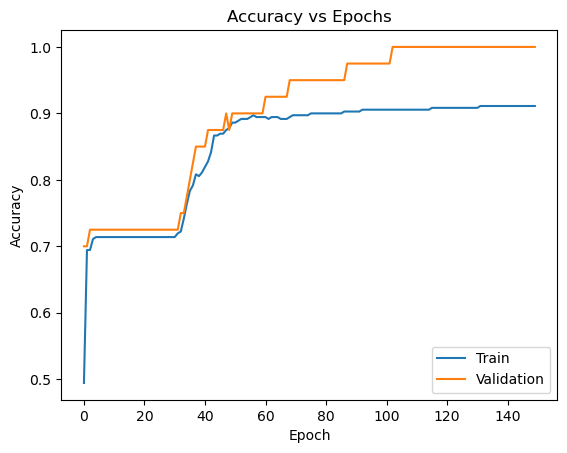

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

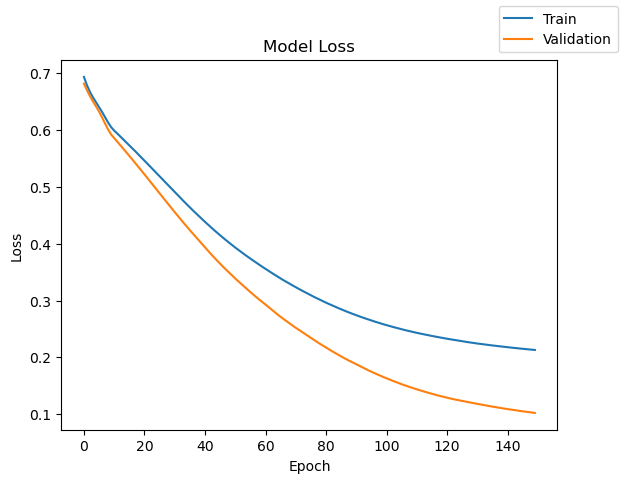

In [38]:
plot(history,'loss')

In [39]:
model_train_perf = model_performance_classification(model, X_train_norm, y_train)
model_train_perf

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.925,0.925,0.924285,0.923924


#  Model 2 (Adam Optimizer + Dropout)

In [40]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [41]:
# We will be adding layers sequentially
model2 = Sequential()

# First hidden layer with 14 neurons and relu activation and input shape denotes number of independent variable
model2.add(Dense(128, activation='relu', input_shape=(X_train_norm.shape[1], )))

#Adding  Dropout to switch off 20% neurons randomly to avoid overfitting.
model2.add(Dropout(0.2))

# Second hidden layer with 7 neurons and relu activation
model2.add(Dense(64, activation='relu'))

#Adding  Dropout to switch off 10% neurons randomly to avoid overfitting.
model2.add(Dropout(0.1))

# Output layer with 1 neuron and sigmoid activation
model2.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model2
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

C:\Users\gbegb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history2 = model2.fit(X_train_norm, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/150
12/12 - 3s - 239ms/step - accuracy: 0.6000 - loss: 0.6767 - val_accuracy: 0.7250 - val_loss: 0.6523
Epoch 2/150
12/12 - 0s - 12ms/step - accuracy: 0.7139 - loss: 0.6452 - val_accuracy: 0.7250 - val_loss: 0.6117
Epoch 3/150
12/12 - 0s - 11ms/step - accuracy: 0.7194 - loss: 0.6016 - val_accuracy: 0.7250 - val_loss: 0.5531
Epoch 4/150
12/12 - 0s - 12ms/step - accuracy: 0.7556 - loss: 0.5562 - val_accuracy: 0.7250 - val_loss: 0.4990
Epoch 5/150
12/12 - 0s - 9ms/step - accuracy: 0.7889 - loss: 0.4956 - val_accuracy: 0.9000 - val_loss: 0.4425
Epoch 6/150
12/12 - 0s - 14ms/step - accuracy: 0.8306 - loss: 0.4447 - val_accuracy: 0.9500 - val_loss: 0.3904
Epoch 7/150
12/12 - 0s - 13ms/step - accuracy: 0.8583 - loss: 0.3986 - val_accuracy: 0.9500 - val_loss: 0.3466
Epoch 8/150
12/12 - 0s - 8ms/step - accuracy: 0.8889 - loss: 0.3569 - val_accuracy: 0.9250 - val_loss: 0.3052
Epoch 9/150
12/12 - 0s - 11ms/step - accuracy: 0.8861 - loss: 0.3366 - val_accuracy: 0.9500 - val_loss: 0.2784
Ep

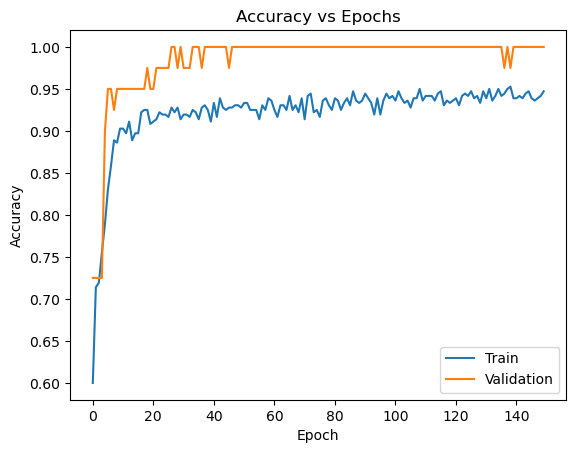

In [43]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

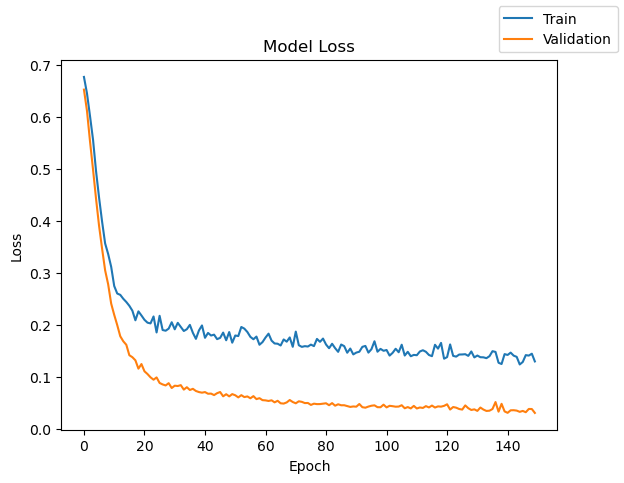

In [44]:
plot(history2,'loss')

In [45]:
model_2_train_perf = model_performance_classification(model2, X_train_norm, y_train)
model_2_train_perf

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9575,0.9575,0.957399,0.957084


# Model 3 (Adam + Dropout of 0.1)

In [46]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [47]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [48]:
model3 = Sequential()
model3.add(Dense(128, activation='tanh', input_shape=(7,)))
model3.add(Dropout(0.1))
model3.add(Dense(64, activation='tanh'))
model3.add(Dropout(0.1))
model3.add(Dense(32, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))

C:\Users\gbegb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history_3 = model3.fit(X_train_norm,
                    y_train,
                    validation_split=0.1,
                    epochs=100,
                    verbose=2)

Epoch 1/100
12/12 - 4s - 296ms/step - accuracy: 0.6694 - loss: 0.6441 - val_accuracy: 0.7250 - val_loss: 0.5926
Epoch 2/100
12/12 - 0s - 12ms/step - accuracy: 0.6972 - loss: 0.5760 - val_accuracy: 0.7750 - val_loss: 0.4981
Epoch 3/100
12/12 - 0s - 13ms/step - accuracy: 0.7278 - loss: 0.5096 - val_accuracy: 0.8000 - val_loss: 0.4419
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.7722 - loss: 0.4720 - val_accuracy: 0.8000 - val_loss: 0.3856
Epoch 5/100
12/12 - 0s - 14ms/step - accuracy: 0.7861 - loss: 0.4285 - val_accuracy: 0.8500 - val_loss: 0.3283
Epoch 6/100
12/12 - 0s - 14ms/step - accuracy: 0.8444 - loss: 0.3862 - val_accuracy: 0.8750 - val_loss: 0.2892
Epoch 7/100
12/12 - 0s - 9ms/step - accuracy: 0.8472 - loss: 0.3634 - val_accuracy: 0.8750 - val_loss: 0.2479
Epoch 8/100
12/12 - 0s - 11ms/step - accuracy: 0.8667 - loss: 0.3323 - val_accuracy: 0.9250 - val_loss: 0.2131
Epoch 9/100
12/12 - 0s - 14ms/step - accuracy: 0.8750 - loss: 0.3132 - val_accuracy: 0.9750 - val_loss: 0.1847
E

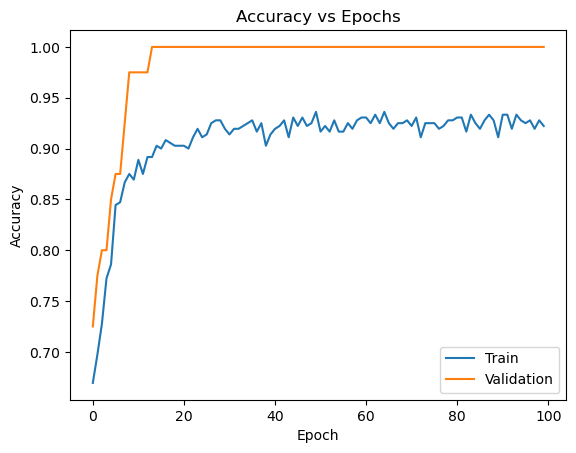

In [51]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

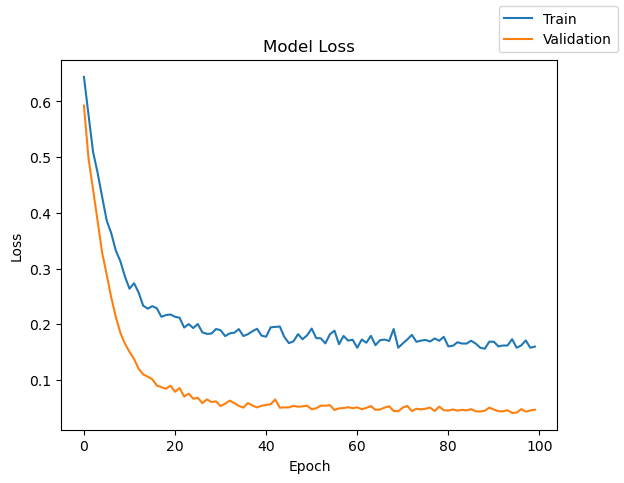

In [52]:
plot(history_3,'loss')

In [53]:
model_3_train_perf = model_performance_classification(model3, X_train_norm, y_train)
model_3_train_perf

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.94,0.94,0.940467,0.938754


# Model 4 (Feed forward with three hidden layer and lr)

In [54]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [55]:
model4 = Sequential()
model4.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model4.add(Dropout(0.1))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

C:\Users\gbegb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history_4 = model4.fit(X_train_norm,
                    y_train,
                    validation_split=0.1,
                    epochs=100,
                    verbose=2)

Epoch 1/100
12/12 - 3s - 291ms/step - accuracy: 0.7139 - loss: 0.6481 - val_accuracy: 0.7250 - val_loss: 0.6125
Epoch 2/100
12/12 - 0s - 10ms/step - accuracy: 0.7139 - loss: 0.5911 - val_accuracy: 0.7250 - val_loss: 0.5343
Epoch 3/100
12/12 - 0s - 9ms/step - accuracy: 0.7556 - loss: 0.5183 - val_accuracy: 0.8250 - val_loss: 0.4532
Epoch 4/100
12/12 - 0s - 13ms/step - accuracy: 0.8028 - loss: 0.4515 - val_accuracy: 0.8750 - val_loss: 0.3803
Epoch 5/100
12/12 - 0s - 10ms/step - accuracy: 0.8639 - loss: 0.3876 - val_accuracy: 0.8750 - val_loss: 0.3144
Epoch 6/100
12/12 - 0s - 14ms/step - accuracy: 0.8833 - loss: 0.3434 - val_accuracy: 0.9250 - val_loss: 0.2506
Epoch 7/100
12/12 - 0s - 9ms/step - accuracy: 0.9167 - loss: 0.2905 - val_accuracy: 0.9500 - val_loss: 0.2091
Epoch 8/100
12/12 - 0s - 9ms/step - accuracy: 0.9056 - loss: 0.2753 - val_accuracy: 0.9500 - val_loss: 0.1834
Epoch 9/100
12/12 - 0s - 13ms/step - accuracy: 0.8972 - loss: 0.2751 - val_accuracy: 0.9500 - val_loss: 0.1458
Epo

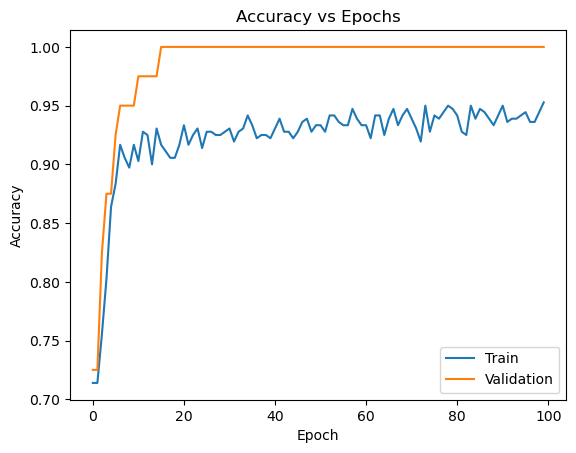

In [57]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

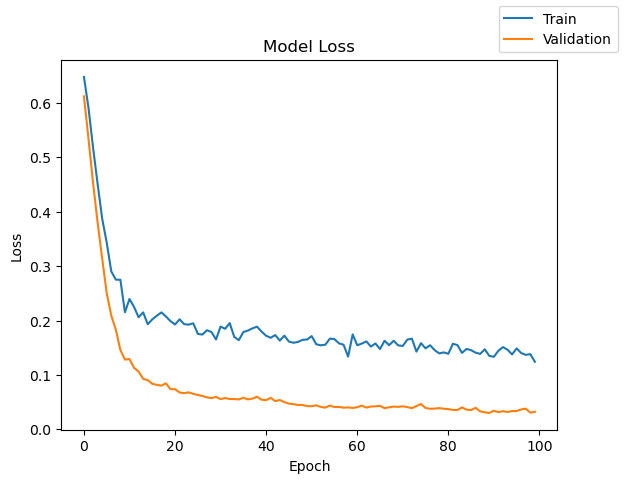

In [58]:
plot(history_4,'loss')

In [59]:
model_4_train_perf = model_performance_classification(model4, X_train_norm, y_train)
model_4_train_perf

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9475,0.9475,0.948061,0.946496


# Model 5 (four hidden layers Neural Network)

In [60]:
# Clearing the backend
from tensorflow.keras import backend

In [61]:
model5 = Sequential()
model5.add(Dense(256, activation='tanh', input_dim=X_train.shape[1]))
model5.add(Dropout(0.1))
model5.add(Dense(128, activation='tanh'))
model5.add(Dropout(0.1))
model5.add(Dense(64, activation='tanh'))
model5.add(Dropout(0.1))
model5.add(Dense(32, activation='tanh'))
model5.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model5.summary()

C:\Users\gbegb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history_5 = model5.fit(X_train_norm,
                    y_train,
                    validation_split=0.1,
                    epochs=200,
                    verbose=2)

Epoch 1/200
12/12 - 4s - 365ms/step - accuracy: 0.6611 - loss: 0.6135 - val_accuracy: 0.7250 - val_loss: 0.5644
Epoch 2/200
12/12 - 0s - 13ms/step - accuracy: 0.7222 - loss: 0.5338 - val_accuracy: 0.7250 - val_loss: 0.4632
Epoch 3/200
12/12 - 0s - 10ms/step - accuracy: 0.7444 - loss: 0.4924 - val_accuracy: 0.8750 - val_loss: 0.3514
Epoch 4/200
12/12 - 0s - 11ms/step - accuracy: 0.8000 - loss: 0.4245 - val_accuracy: 0.9000 - val_loss: 0.2997
Epoch 5/200
12/12 - 0s - 14ms/step - accuracy: 0.8389 - loss: 0.3695 - val_accuracy: 0.9000 - val_loss: 0.2692
Epoch 6/200
12/12 - 0s - 11ms/step - accuracy: 0.8417 - loss: 0.3541 - val_accuracy: 0.9000 - val_loss: 0.2475
Epoch 7/200
12/12 - 0s - 11ms/step - accuracy: 0.8556 - loss: 0.3348 - val_accuracy: 0.9000 - val_loss: 0.2210
Epoch 8/200
12/12 - 0s - 11ms/step - accuracy: 0.8583 - loss: 0.3253 - val_accuracy: 0.9000 - val_loss: 0.1829
Epoch 9/200
12/12 - 0s - 11ms/step - accuracy: 0.8778 - loss: 0.2826 - val_accuracy: 0.9250 - val_loss: 0.1596


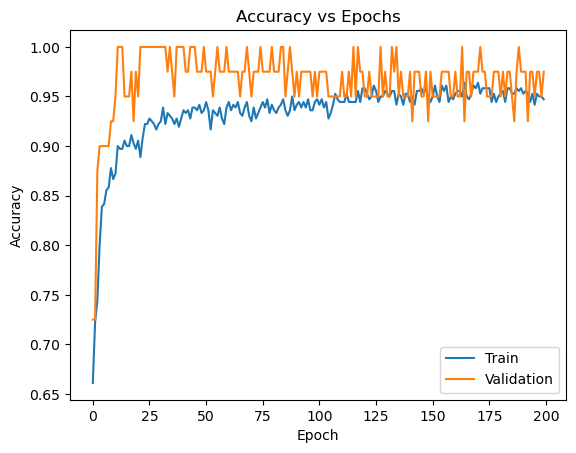

In [63]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

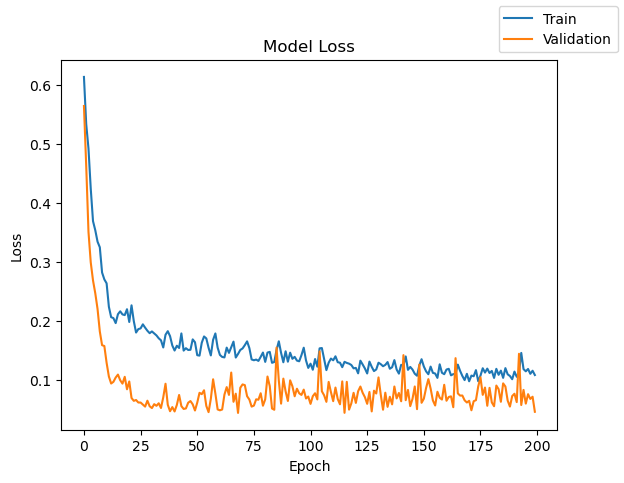

In [64]:
plot(history_5,'loss')

In [65]:
model_5_train_perf = model_performance_classification(model4, X_train_norm, y_train)
model_5_train_perf

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Accuracy,Recall,Precision,F1 Score
0,0.9475,0.9475,0.948061,0.946496


## Model Performance Comparison and Final Model Selection

In [66]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (Adamax, No Regularization)",
    "Neural Network (Adam, dropout [0.2,0.1])",
    "Neural Network (Adam, dropout [0.1])",
    "Neural Network (Adam, dropout [0.1,0.1])",
    "Neural Network (Adam, dropout [0.1,0.1,0.1])"
]

In [67]:
models_train_comp_df

,"Neural Network (Adamax, No Regularization)","Neural Network (Adam, dropout [0.2,0.1])","Neural Network (Adam, dropout [0.1])","Neural Network (Adam, dropout [0.1,0.1])","Neural Network (Adam, dropout [0.1,0.1,0.1])"
Accuracy,0.925000,0.957500,0.940000,0.947500,0.947500
Recall,0.925000,0.957500,0.940000,0.947500,0.947500
Precision,0.924285,0.957399,0.940467,0.948061,0.948061
F1 Score,0.923924,0.957084,0.938754,0.946496,0.946496


### **Model evaluation on the test data**

In [68]:
model2.evaluate(X_test_norm, y_test, verbose = 1)
test_pred = np.round(model2.predict(X_test_norm))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9314 - loss: 0.1820 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


The test accuracy is coming out to be 93% which implies that our model is able to replicate the performance from the train and validation data on the test (unseen) data.

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.92      0.82      0.87        28

    accuracy                           0.93       100
   macro avg       0.93      0.90      0.91       100
weighted avg       0.93      0.93      0.93       100



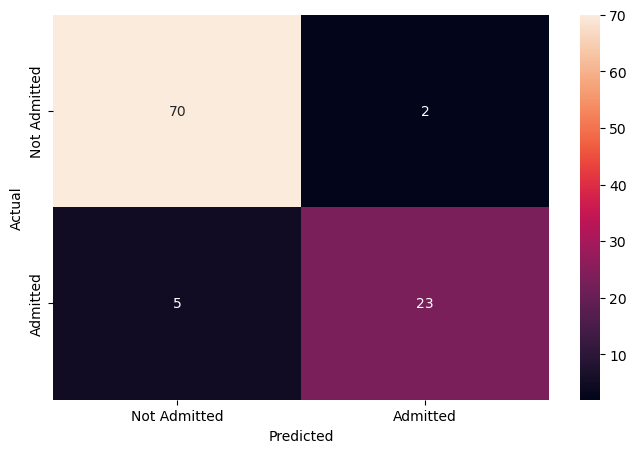

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

- The confusion matrix shows that the model can identify the majority of students who would get admission and who won't get admission to UCLA.
- The classification report shows that all the metrics except recall & f1-score for class 1 are above 90%, which is good.

#### Saving the model for Production Deployment

In [70]:
import pickle

In [71]:
pickle.dump(model2, open('model.pkl','wb'))